In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [5]:
# Database Setup
engine= create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
session.query(Measurement.date, Measurement.prcp)

In [11]:
# Design a query to retrieve precipitation data of the month of December 
# across all of the stations and years using the describe() function

# Perform a query to retrieve the data and precipitation scores
results_december=[]

# All data:
results = session.query(Measurement.date, Measurement.prcp)


In [12]:
# Select the month of December accross the database:
results_december = session.query(Measurement.date, Measurement.prcp).filter(
    extract("month", Measurement.date) == 12
).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df_december = pd.DataFrame(results_december, columns=['date','precipitation'])
df_december.set_index(df_december['date'], inplace=True)

# Sort the dataframe by date
df_december = df_december.sort_index()
df_december.head()

,date,precipitation
date,,
2010-12-01,2010-12-01,0.04
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,0.70
2010-12-01,2010-12-01,0.03
2010-12-01,2010-12-01,1.35


In [13]:
# Create column for year only:
df_december["year"] = df_december["date"].str.slice(0, 4).astype(int)
df_december.head()

,date,precipitation,year
date,,,
2010-12-01,2010-12-01,0.04,2010
2010-12-01,2010-12-01,0.03,2010
2010-12-01,2010-12-01,0.70,2010
2010-12-01,2010-12-01,0.03,2010
2010-12-01,2010-12-01,1.35,2010


In [14]:
# APPROACH 1:
# using method groupby to calculate the average precipitation per year accross all 
# of the stations for the month of December
df_december.groupby("year")["precipitation"].mean()

year
2010    0.459087
2011    0.201581
2012    0.089604
2013    0.169014
2014    0.188439
2015    0.169506
2016    0.199494
Name: precipitation, dtype: float64

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data across all of the stations and years
# using the describe() function
df_december.groupby("year")["precipitation"].mean().describe()

count    7.000000
mean     0.210961
std      0.115829
min      0.089604
25%      0.169260
50%      0.188439
75%      0.200538
max      0.459087
Name: precipitation, dtype: float64

In [16]:
# APPROACH 2:
# calculating accross all of the stations and years without the method group by
df_december["precipitation"]

date
2010-12-01    0.04
2010-12-01    0.03
2010-12-01    0.70
2010-12-01    0.03
2010-12-01    1.35
              ... 
2016-12-31    0.25
2016-12-31    0.36
2016-12-31    0.01
2016-12-31    0.62
2016-12-31    0.90
Name: precipitation, Length: 1517, dtype: float64

In [17]:
# key statistical data in December across all stations and years using the describe() function.
df_december["precipitation"].describe()

count    1405.000000
mean        0.216819
std         0.541399
min         0.000000
25%         0.000000
50%         0.030000
75%         0.150000
max         6.420000
Name: precipitation, dtype: float64

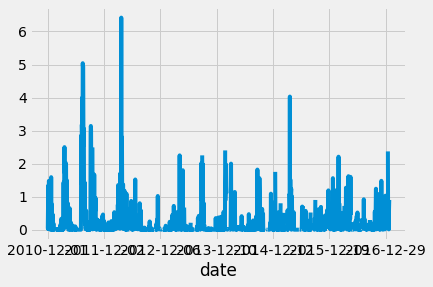

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
df_december["precipitation"].plot()

In [19]:
# Design a query to retrieve precipitation data of the month of June 
# across all of the stations and years using the describe() function


# Perform a query to retrieve the data and precipitation scores
results_june=[]
#results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

results_june = session.query(Measurement.date, Measurement.prcp).filter(
    extract("month", Measurement.date) == 6
).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df_june = pd.DataFrame(results_june, columns=['date','precipitation'])
df_june.set_index(df_june['date'], inplace=True)

# Sort the dataframe by date
df_june = df_june.sort_index()
df_june.head()

,date,precipitation
date,,
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,0.01
2010-06-01,2010-06-01,0.00
2010-06-01,2010-06-01,NaN
2010-06-01,2010-06-01,0.03


In [20]:
# Create column for year only:
df_june["year"] = df_june["date"].str.slice(0, 4).astype(int)
df_june.head()

,date,precipitation,year
date,,,
2010-06-01,2010-06-01,0.00,2010
2010-06-01,2010-06-01,0.01,2010
2010-06-01,2010-06-01,0.00,2010
2010-06-01,2010-06-01,NaN,2010
2010-06-01,2010-06-01,0.03,2010


In [21]:
# APPROACH 1:
# using method groupby to calculate the average precipitation per year accross all 
# of the stations for the month of June
df_june.groupby("year")["precipitation"].mean()

year
2010    0.042241
2011    0.240142
2012    0.097062
2013    0.144195
2014    0.124372
2015    0.125160
2016    0.212312
2017    0.120000
Name: precipitation, dtype: float64

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data across all of the stations and years
# using the describe() function
df_june.groupby("year")["precipitation"].mean().describe()

count    8.000000
mean     0.138185
std      0.062694
min      0.042241
25%      0.114265
50%      0.124766
75%      0.161224
max      0.240142
Name: precipitation, dtype: float64

In [23]:
# APPROACH 2:
# calculating accross all of the stations and years without the method group by
df_june["precipitation"]

date
2010-06-01    0.00
2010-06-01    0.01
2010-06-01    0.00
2010-06-01     NaN
2010-06-01    0.03
              ... 
2017-06-30    0.01
2017-06-30    0.08
2017-06-30    0.07
2017-06-30    0.04
2017-06-30    0.20
Name: precipitation, Length: 1700, dtype: float64

In [24]:
# Use Pandas to calcualte the summary statistics for the June precipitation data 
df_june["precipitation"].describe()

count    1574.000000
mean        0.136360
std         0.335731
min         0.000000
25%         0.000000
50%         0.020000
75%         0.120000
max         4.430000
Name: precipitation, dtype: float64

(0.0, 4.0)

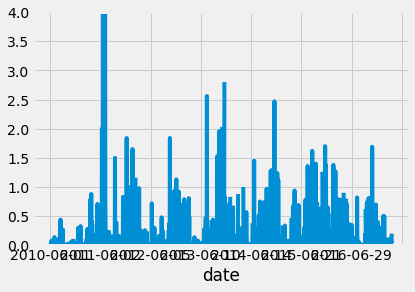

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
df_june["precipitation"].plot()
plt.ylim(0, 4)

(0.0, 4.0)

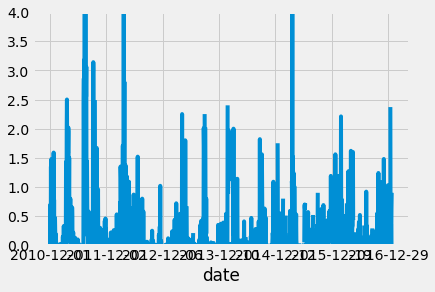

In [26]:
df_december["precipitation"].plot()
plt.ylim(0, 4)

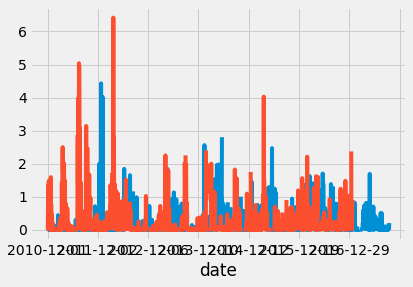

In [27]:
df_june["precipitation"].plot()
df_december["precipitation"].plot()

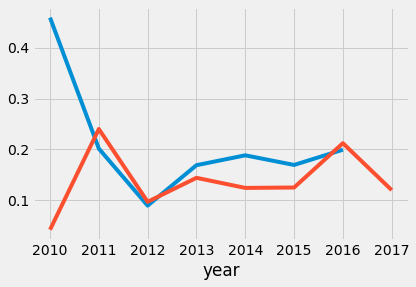

In [28]:
df_december.groupby("year")["precipitation"].mean().plot()
df_june.groupby("year")["precipitation"].mean().plot()